In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# read the data

In [222]:
df=pd.read_csv("MLPROJECT/heat.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145,233,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160,286,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120,229,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130,250,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130,204,0,2,172.0,0,1.4,1,0,3,0


# data cleaning

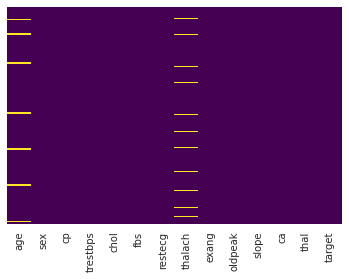

In [224]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

# check the percetile of misiing data

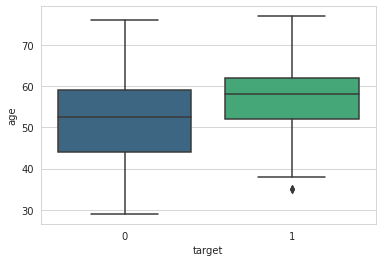

In [227]:
sns.boxplot(x='target',y='age',data=df,palette='viridis')
plt.show()

In [228]:
def inputs_age(cols):
    age=cols[0]
    target=cols[1]
    if(pd.isnull(age)):
        if(target==0):
            return 53
        else:
            return 58
    else:
        return age
df['age']=df[['age','target']].apply(inputs_age,axis=1)

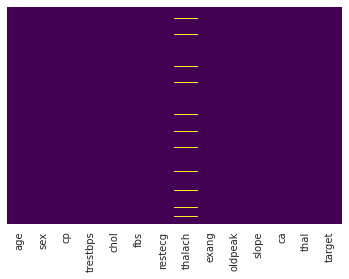

In [229]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [230]:
import math
mean_age=math.floor(df.thalach.mean())
df.thalach=df.thalach.fillna(mean_age)

# now data is clean

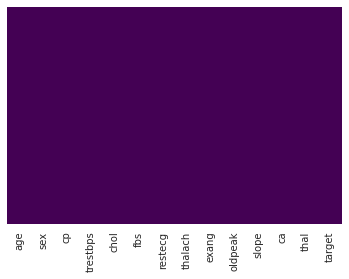

In [232]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

# feature selection

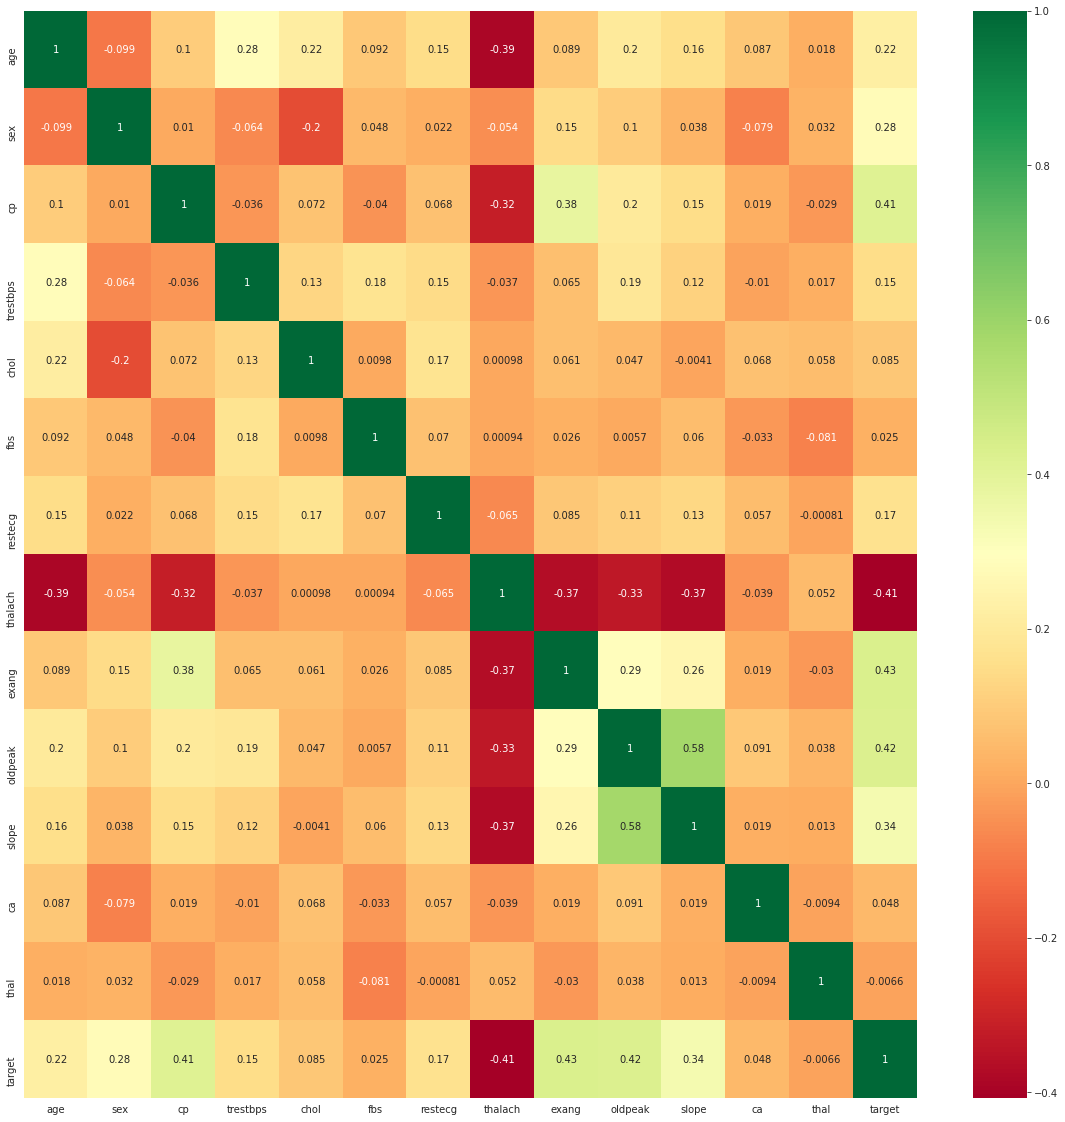

In [233]:
corrfeat=df.corr()
top_corr_feat=corrfeat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_feat].corr(),annot=True,cmap='RdYlGn')


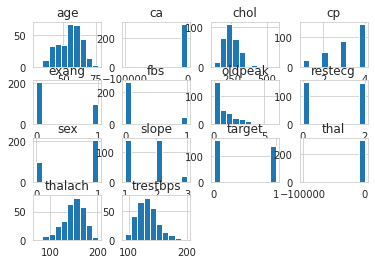

In [234]:
a=df.hist()

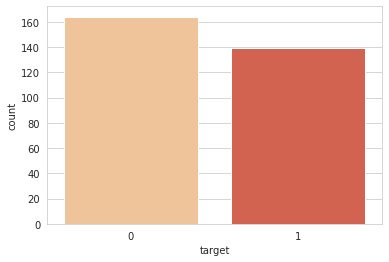

In [235]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='OrRd')

# data allocate

In [236]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# preprocessing and split the data

In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

# LogisticRegression

In [239]:
reg=LogisticRegression(random_state=0,max_iter=1000)
reg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
y_pred=reg.predict(xtest)

In [241]:
c=reg.coef_
print(c)
i=reg.intercept_
print(i)

[[ 2.70624167e-01  6.59575516e-01  6.45791889e-01  3.54870569e-01
   4.01610330e-01 -1.40289343e-01  3.16530035e-04 -5.21091893e-01
   6.51161057e-01  5.49598005e-01  3.53281430e-01 -3.14940287e-02
  -5.08481909e-02]]
[-0.22465359]


In [242]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[30, 10],
       [12, 24]])

In [243]:
from sklearn import metrics
y_pred = reg.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.7105263157894737


# KNeighborsClassifier

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

# Finding the best value for k

Text(0.5, 1.0, 'K Neighbors Classifier scores for different k values')

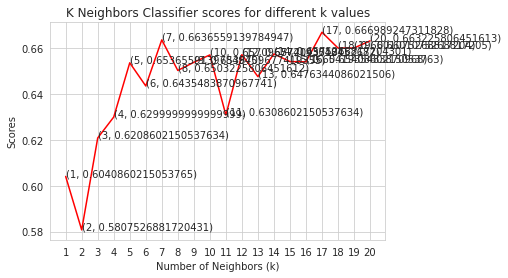

In [244]:
plt.plot([k for k in range(1,21)],knn_scores,color='red')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel("Number of Neighbors (k)")
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different k values')

In [245]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=20,weights='distance')
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

In [246]:
from sklearn import metrics
y_pred = classifier.predict(xtest)

In [247]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[30, 10],
       [12, 24]])

In [248]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.7105263157894737


# RandomForestClassifier

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [214]:
random_class=RandomForestClassifier(n_estimators=10)
random_class=random_class.fit(xtrain,ytrain)
y_pred=random_class.predict(xtest)

In [215]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[29, 11],
       [11, 25]])

In [216]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.7105263157894737


# DecisionTreeClassifier

In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [251]:
des_class=DecisionTreeClassifier()
des_class = des_class.fit(xtrain,ytrain)
y_pred = des_class.predict(xtest)

In [252]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[32,  8],
       [10, 26]])

In [253]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.7631578947368421
